In [11]:
import torch
from model.layers import Linear, Relu, Tanh, Leaky_Relu, Elu, Sigmoid
from model.loss_func import MSELoss
from model.optimizers import SGD, AdaGrad, Adam, MomentumSGD
from model.Sequential import Sequential
from matplotlib import pyplot as plt
from helpers import normalize, plotLossAcc, generate_disc_set, train, cross_validation, one_hot_encoding, train_cv

In [7]:
# initial setups
torch.manual_seed(0)
nb_epochs = 100
batch_size = 50

# Generate training and test data sets and normalize
train_input, train_label= generate_disc_set(1000)
test_input, test_label = generate_disc_set(1000)
train_target = one_hot_encoding(train_label)
test_target = one_hot_encoding(test_label)
train_input = normalize(train_input)
test_input = normalize(test_input)

# K-fold cross validation to optimize learning rate over range lr_set
k_fold = 5

### a. Activation function comparison

We use SGD as optimizer and MSE as loss function to test the loss convergence of different models with corresponding activation functions.  
Relu, Elu, Leaky Relu and Tanh are tested with 100 epochs

In [196]:
optimizer_name = SGD
loss = MSELoss()

##### 1. ReLU

In [13]:
# cross validation
lr_set = torch.logspace(-3, -0, 5)
model= Sequential(Linear(2,25), Relu(), Linear(25,25), Relu(),Linear(25,25), Relu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

NameError: name 'np' is not defined

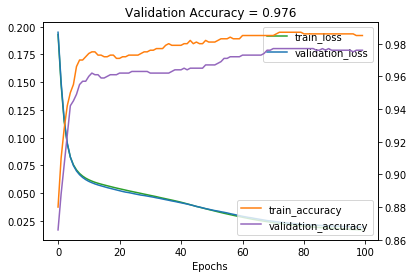

In [198]:
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_relu, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_relu, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 2. Elu

In [178]:
# cross validation
lr_set = torch.logspace(-3, 0, 5)
model= Sequential(Linear(2,25), Elu(), Linear(25,25), Elu(), Linear(25,25), Elu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
1.0


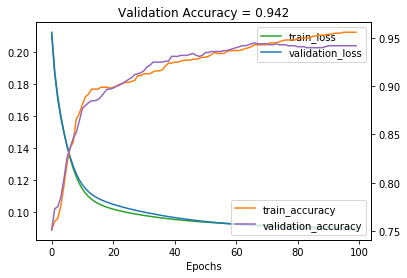

In [179]:
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_elu, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_elu, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 3. Leaky Relu

In [180]:
# cross validation
lr_set = torch.logspace(-1, 0, 5)
model= Sequential(Linear(2,25), Leaky_Relu(), Linear(25,25), Leaky_Relu(),Linear(25,25), Leaky_Relu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.10000000149011612


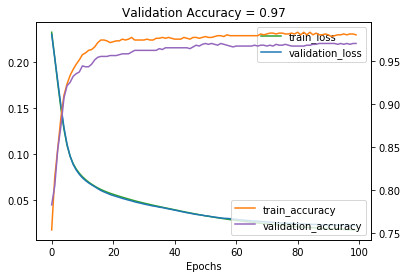

In [181]:
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_leaky, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_leaky, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 4. Tanh

In [182]:
# cross validation
lr_set = torch.logspace(-2, 1, 5)
model= Sequential(Linear(2,25), Tanh(), Linear(25,25), Tanh(),Linear(25,25), Tanh(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.05623413249850273


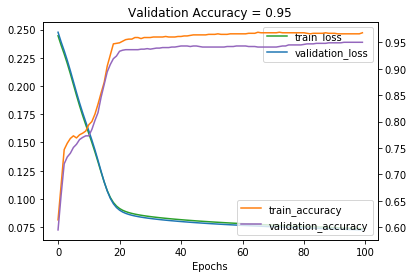

In [183]:
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_tanh, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_tanh, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### Plot loss convergence comparison among different activation functions

In [199]:
def plotLoss(loss_tr,  x_var, xlabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    ax1.set_xlabel(xlabel)
    ax1.plot(x_var, loss_tr[0], color=color_tr)
    ax1.plot(x_var, loss_tr[1], color=color_te)
    ax1.plot(x_var, loss_tr[2], color=color_tra)
    ax1.plot(x_var, loss_tr[3], color=color_tea)

    ax1.legend(["relu", "leaky relu", "elu", "tanh"])

    ax1.set_title("loss comparison")

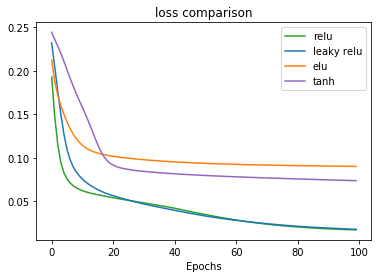

In [200]:
loss = [loss_train_relu, loss_train_leaky, loss_train_elu, loss_train_tanh]
plotLoss(loss,  torch.arange(nb_epochs), "Epochs")

### b. Optimizers comparison

We use Relu and Tanh(last layer) as activation function and MSE as loss function to test the loss convergence of different models with corresponding optimizers.  
SGD, momentSGD, Adagrad, Adam are tested with 100 epochs

In [12]:
# build model and loss function
model= Sequential(Linear(2,25), Relu(), Linear(25,25), Relu(),Linear(25,25), Relu(), Linear(25,2), Tanh())
loss = MSELoss()

NameError: name 'np' is not defined

#### 1. Adam

In [8]:
# cross validation
lr_set = torch.logspace(-5, -3, 5)
optimizer_name = Adam
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_adam, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_adam, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

NameError: name 'model' is not defined

#### 2. Moment SGD

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.005623413249850273


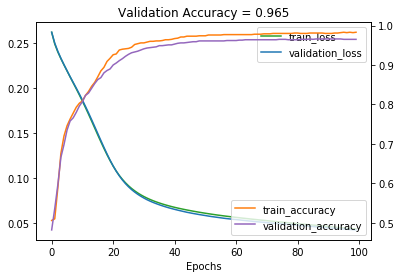

In [205]:
# cross validation
lr_set = torch.logspace(-3, -2, 5)
optimizer_name = MomentumSGD
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_moment, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_moment, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 3. Adagrad

In [213]:
# cross validation
lr_set = torch.logspace(-3, -2, 5)
optimizer_name = AdaGrad
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_adagrad, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_adagrad, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

Running cross validation. Progress:   0.0 %


AttributeError: 'list' object has no attribute 'backward'

In [212]:
# cross validation
lr_set = torch.logspace(-5, -3, 5)
optimizer_name = SGD
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_sgd, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_sgd, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

Running cross validation. Progress:   0.0 %


AttributeError: 'list' object has no attribute 'backward'

#### Plot loss convergence comparison among different activation functions

In [207]:
def plotLoss(loss_tr,  x_var, xlabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    ax1.set_xlabel(xlabel)
    ax1.plot(x_var, loss_tr[0], color=color_tr)
    ax1.plot(x_var, loss_tr[1], color=color_te)
    ax1.plot(x_var, loss_tr[2], color=color_tra)
    ax1.plot(x_var, loss_tr[3], color=color_tea)

    ax1.legend(["SGD", "moment", "adagrad", "adam"])
    ax1.set_title("loss comparison")

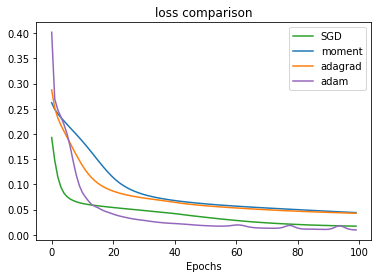

In [215]:
lossese = [loss_train_relu, loss_train_moment, loss_train_adagrad, loss_train_adam]
plotLoss(lossese,  torch.arange(nb_epochs), "Epochs")